In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from nsepy import get_history
plt.style.use('fivethirtyeight')

In [2]:
start = datetime(2020, 1, 1)
end = datetime(2021, 1, 2)

data = get_history(symbol="PNB", start=start, end=end)
data.to_csv('tmp.csv')

In [3]:
df = pd.read_csv('tmp.csv', parse_dates=["Date"], index_col="Date") 

In [4]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-01-01,PNB,EQ,64.35,64.50,65.05,63.95,65.00,64.70,64.47,8568946,5.524661e+13,21453,1022635,0.1193
2020-01-02,PNB,EQ,64.70,65.00,67.00,64.55,66.80,66.70,66.16,26059066,1.723948e+14,51834,4549023,0.1746
2020-01-03,PNB,EQ,66.70,66.55,66.55,64.60,65.10,65.05,65.46,14906983,9.758592e+13,31813,2386870,0.1601
2020-01-06,PNB,EQ,65.05,64.90,64.90,61.00,61.55,61.40,61.96,24078755,1.491827e+14,52853,5172319,0.2148
2020-01-07,PNB,EQ,61.40,62.10,63.10,61.00,61.85,61.85,61.99,20436567,1.266915e+14,40468,2440498,0.1194


In [5]:
#Drop colm & Show the data 
df.drop(['Series','Turnover','Trades','Deliverable Volume', '%Deliverble'],axis=1,inplace = True)

In [6]:
df['Opening High& Low'] = (df['Open']- df['Prev Close']).round(decimals = 2)

In [7]:
df['Day Result'] = (df['Close']- df['Open']).round(decimals = 2)

In [8]:
df.tail()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result
Date,,,,,,,,,,,
2020-12-28,PNB,31.45,31.85,32.90,31.50,32.50,32.40,32.27,145990073,0.40,0.55
2020-12-29,PNB,32.40,32.90,34.15,32.80,33.30,33.20,33.37,160162623,0.50,0.30
2020-12-30,PNB,33.20,33.70,33.70,32.35,32.70,32.75,32.75,92597922,0.50,-0.95
2020-12-31,PNB,32.75,32.80,33.35,32.40,33.05,33.05,32.94,189388220,0.05,0.25
2021-01-01,PNB,33.05,33.30,34.95,33.10,34.85,34.80,34.35,227528491,0.25,1.50


In [9]:
#df_data['Percentage'] = ((df_data['Diff'] * 100) / df_data['Open']).round(decimals = 2).astype(str) + '%'

df['Change'] = ((df['Day Result'] * 100) / df['Open']).round(decimals = 2)

df.tail()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,,
2020-12-28,PNB,31.45,31.85,32.90,31.50,32.50,32.40,32.27,145990073,0.40,0.55,1.73
2020-12-29,PNB,32.40,32.90,34.15,32.80,33.30,33.20,33.37,160162623,0.50,0.30,0.91
2020-12-30,PNB,33.20,33.70,33.70,32.35,32.70,32.75,32.75,92597922,0.50,-0.95,-2.82
2020-12-31,PNB,32.75,32.80,33.35,32.40,33.05,33.05,32.94,189388220,0.05,0.25,0.76
2021-01-01,PNB,33.05,33.30,34.95,33.10,34.85,34.80,34.35,227528491,0.25,1.50,4.50


In [10]:
#df_data.loc[(df_data["Diff"] > 0)].values
df.loc[(df["Change"] > 0)]

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,,
2020-01-01,PNB,64.35,64.50,65.05,63.95,65.00,64.70,64.47,8568946,0.15,0.20,0.31
2020-01-02,PNB,64.70,65.00,67.00,64.55,66.80,66.70,66.16,26059066,0.30,1.70,2.62
2020-01-09,PNB,60.85,62.30,63.00,61.80,62.60,62.60,62.42,18885640,1.45,0.30,0.48
2020-01-13,PNB,62.45,62.75,63.35,62.60,63.20,63.20,63.02,13131132,0.30,0.45,0.72
2020-01-15,PNB,62.80,62.85,63.70,61.90,63.35,63.40,62.89,13919689,0.05,0.55,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,PNB,40.50,41.00,41.50,40.70,41.25,41.25,41.16,52117435,0.50,0.25,0.61
2020-12-28,PNB,31.45,31.85,32.90,31.50,32.50,32.40,32.27,145990073,0.40,0.55,1.73
2020-12-29,PNB,32.40,32.90,34.15,32.80,33.30,33.20,33.37,160162623,0.50,0.30,0.91


In [11]:
df.loc[(df["Change"] < 0) ]

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,,
2020-01-03,PNB,66.70,66.55,66.55,64.60,65.10,65.05,65.46,14906983,-0.15,-1.50,-2.25
2020-01-06,PNB,65.05,64.90,64.90,61.00,61.55,61.40,61.96,24078755,-0.15,-3.50,-5.39
2020-01-07,PNB,61.40,62.10,63.10,61.00,61.85,61.85,61.99,20436567,0.70,-0.25,-0.40
2020-01-08,PNB,61.85,61.00,61.60,60.15,60.85,60.85,60.81,22182671,-0.85,-0.15,-0.25
2020-01-10,PNB,62.60,62.95,63.85,62.05,62.45,62.45,62.92,17939103,0.35,-0.50,-0.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,PNB,36.55,36.00,36.85,33.00,33.70,34.10,35.26,73372682,-0.55,-1.90,-5.28
2020-12-22,PNB,34.10,33.85,34.75,31.70,33.35,33.40,32.87,118459132,-0.25,-0.45,-1.33
2020-12-23,PNB,33.40,32.10,32.75,31.70,31.85,31.80,32.10,178237037,-1.30,-0.30,-0.93


In [12]:
df.loc[ (df['Opening High& Low'] > 0) & (df['Day Result'] > 0) ]

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,,
2020-01-01,PNB,64.35,64.50,65.05,63.95,65.00,64.70,64.47,8568946,0.15,0.20,0.31
2020-01-02,PNB,64.70,65.00,67.00,64.55,66.80,66.70,66.16,26059066,0.30,1.70,2.62
2020-01-09,PNB,60.85,62.30,63.00,61.80,62.60,62.60,62.42,18885640,1.45,0.30,0.48
2020-01-13,PNB,62.45,62.75,63.35,62.60,63.20,63.20,63.02,13131132,0.30,0.45,0.72
2020-01-15,PNB,62.80,62.85,63.70,61.90,63.35,63.40,62.89,13919689,0.05,0.55,0.88
2020-01-23,PNB,61.00,61.05,62.35,61.00,61.85,61.80,61.73,14136138,0.05,0.75,1.23
2020-01-31,PNB,59.95,60.35,61.20,59.80,60.50,60.45,60.49,15449355,0.40,0.10,0.17
2020-02-06,PNB,56.90,57.35,59.30,56.90,58.60,58.65,58.16,26534154,0.45,1.30,2.27
2020-02-19,PNB,52.00,52.50,53.10,51.70,52.80,52.70,52.44,13554123,0.50,0.20,0.38


In [13]:
# another way to take column data
#open_data = df_data.iloc[:, 0].values
df_close = df.iloc[:, 5]
df_close

Date
2020-01-01    65.00
2020-01-02    66.80
2020-01-03    65.10
2020-01-06    61.55
2020-01-07    61.85
              ...  
2020-12-28    32.50
2020-12-29    33.30
2020-12-30    32.70
2020-12-31    33.05
2021-01-01    34.85
Name: Last, Length: 253, dtype: float64

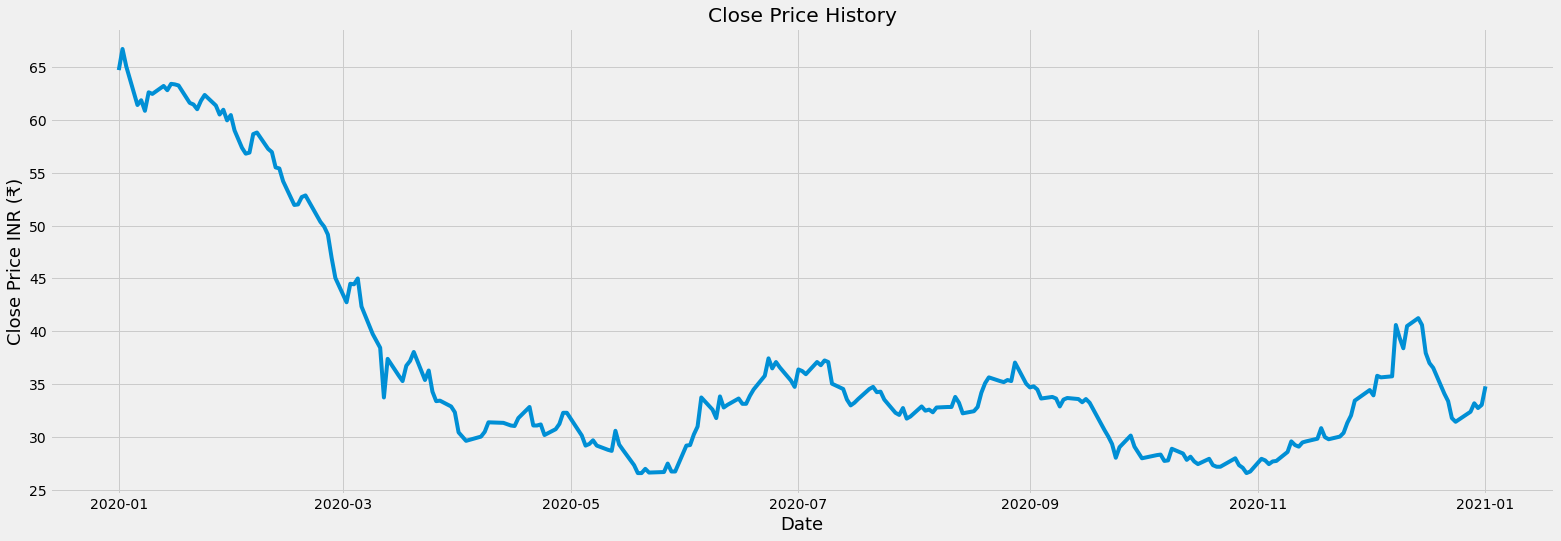

In [14]:
#Visualize the closing price history
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

In [15]:
# summarize the data
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,37.052372,37.128458,37.810672,36.256719,36.951779,36.935573,37.014743,3.946798e+07,0.076087,-0.192885,-0.424783
std,10.669496,10.669230,10.692564,10.487543,10.531939,10.530318,10.567545,3.722534e+07,0.615678,1.069884,2.954684
min,26.600000,26.600000,26.900000,26.300000,26.550000,26.600000,26.550000,5.257310e+06,-3.350000,-3.550000,-8.250000
25%,30.150000,30.300000,30.800000,29.550000,30.150000,30.150000,30.180000,1.871920e+07,-0.050000,-0.750000,-2.180000
50%,33.400000,33.450000,34.100000,32.750000,33.400000,33.400000,33.370000,2.659361e+07,0.100000,-0.200000,-0.500000
75%,37.100000,37.150000,38.350000,36.100000,37.200000,37.100000,37.220000,4.220737e+07,0.300000,0.350000,0.920000
max,66.700000,66.550000,67.000000,64.600000,66.800000,66.700000,66.160000,2.275285e+08,1.750000,6.200000,19.870000
